# 1. Import Libraries and Read Image 
# نبدأ بتحميل المكتبات الأساسية وقراءة الصورة الملونة والرمادية. 

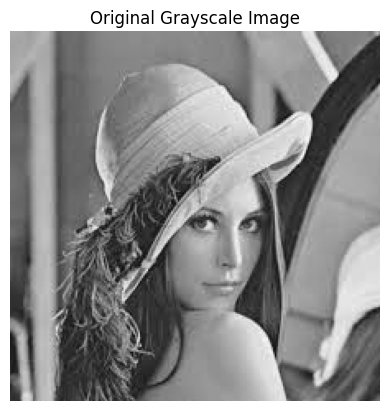

In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# قراءة الصورة الملونة i
img_color = cv2.imread("sofia.jpg") 
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) 
# قراءة الصورة الرمادية 
img_gray = cv2.imread("sofia.jpg", 0) 
plt.imshow(img_gray, cmap='gray') 
plt.title("Original Grayscale Image")
plt.axis('off') 
plt.show()


 # 2. Contrast Stretching (Manual) 
 # تحسين تباين الصورة عن طريق توسيع نطاق قيم البكسل من المجال الأصلي إلى المجال الكامل 0-255

C:\Users\hisha\AppData\Local\Temp\ipykernel_1852\1555611241.py:11: RuntimeWarning: overflow encountered in scalar multiply
  contrast[i,j] = ((img_gray[i,j] - min_val) * 255) / (max_val - min_val)


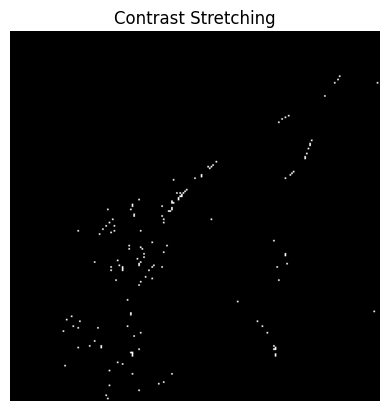

In [ ]:
rows, cols = img_gray.shape 
min_val = img_gray[0,0] 
max_val = img_gray[0,0] 
for i in range(rows): 
    for j in range(cols): 
        if img_gray[i,j] < min_val: min_val = img_gray[i,j] 
        if img_gray[i,j] > max_val: max_val = img_gray[i,j] 
contrast = np.zeros((rows, cols), dtype=np.uint8) 
for i in range(rows): 
    for j in range(cols): 
        contrast[i,j] = ((img_gray[i,j] - min_val) * 255) / (max_val - min_val) 
plt.imshow(contrast, cmap='gray') 
plt.title("Contrast Stretching") 
plt.axis('off') 
plt.show()

# 3. Gamma Correction (Manual) 
# تعديل إضاءة الصورة عبر رفع قيمة كل بكسل إلى قوة gamma. 

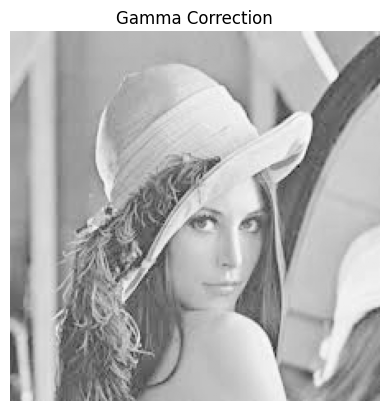

In [ ]:
gamma = 0.5 
gamma_img = np.zeros((rows, cols), dtype=np.uint8) 
for i in range(rows): 
    for j in range(cols): 
        r = img_gray[i,j] / 255.0 
        s = r ** gamma 
        gamma_img[i,j] = s * 255 
plt.imshow(gamma_img, cmap='gray') 
plt.title("Gamma Correction") 
plt.axis('off') 
plt.show() 


# 4. RGB to GPR Conversion 
# إعادة ترتيب القنوات من RGB إلى GPR (Green, Blue, Red).

In [ ]:
rows, cols, _ = img_color.shape 
gpr = np.zeros((rows, cols, 3), dtype=np.uint8) 
for i in range(rows): 
    for j in range(cols): 
        R = img_color[i,j,0] 
        G = img_color[i,j,1] 
        B = img_color[i,j,2] 
        gpr[i,j] = [G, B, R] 
plt.imshow(gpr) 
plt.title("RGB to GPR") 
plt.axis('off') 
plt.show()

# 5. GPR to RGB Conversion 
# إعادة ترتيب القنوات من GPR إلى RGB.

In [ ]:
rgb_back = np.zeros((rows, cols, 3), dtype=np.uint8) 
for i in range(rows): 
    for j in range(cols): 
        G = gpr[i,j,0] 
        B = gpr[i,j,1] 
        R = gpr[i,j,2] 
        rgb_back[i,j] = [R, G, B] 
plt.imshow(rgb_back) 
plt.title("GPR to RGB") 
plt.axis('off') 
plt.show()

# 6. Negative Image 
# عكس ألوان الصورة عن طريق طرح قيمة كل بكسل من 255. 

In [ ]:
negative = np.zeros((rows, cols, 3), dtype=np.uint8) 
for i in range(rows): 
    for j in range(cols): 
        negative[i,j,0] = 255 - img_color[i,j,0] 
        negative[i,j,1] = 255 - img_color[i,j,1] 
        negative[i,j,2] = 255 - img_color[i,j,2] 
plt.imshow(negative) 
plt.title("Negative Image") 
plt.axis('off') 
plt.show()

# 7. RGB to Grayscale (Manual) 
# تحويل صورة ملونة إلى رمادية باستخدام معادلة الأوزان.

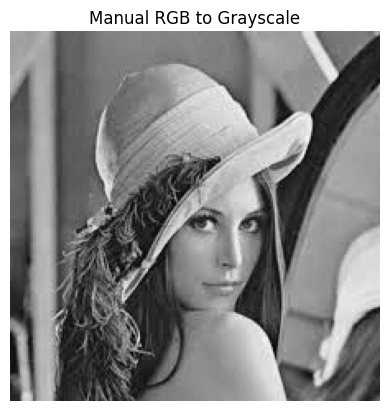

In [ ]:
gray_manual = np.zeros((rows, cols), 

dtype=np.uint8) 
for i in range(rows): 
    for j in range(cols): 
        R = img_color[i, j, 0] 
        G = img_color[i, j, 1] 
        B = img_color[i, j, 2] 
        gray_manual[i, j] = 0.299 * R + 0.587 * G + 0.114 * B 
plt.imshow(gray_manual, cmap='gray') 
plt.title("Manual RGB to Grayscale") 
plt.axis('off') 
plt.show()

# 8. Histogram Equalization (Manual)
# تحسين تباين الصورة الرمادية عبر توزيع تراكمي لقيم البكسل. 

In [ ]:
hist = np.zeros(256) 
for i in range(rows): 
    for j in range(cols): 
        hist[gray_manual[i, j]] += 1 
cdf = np.zeros(256) 
cdf[0] = hist[0] 

for i in range(1, 256): 
    cdf[i] = cdf[i-1] + hist[i] 

cdf_min = 0 
for i in range(256): 
    if cdf[i] != 0: 
        cdf_min = cdf[i] 
        break 

total_pixels = rows * cols 
cdf_normalized = np.zeros(256) 
for i in range(256): 
    cdf_normalized[i] = round(((cdf[i] - cdf_min) / (total_pixels - cdf_min)) * 255) 

equalized = np.zeros((rows, cols), dtype=np.uint8) 
for i in range(rows): 
    for j in range(cols): 
        equalized[i, j] = cdf_normalized[gray_manual[i, j]] 

plt.imshow(equalized, cmap='gray') 
plt.title("Manual Histogram Equalization") 
plt.axis('off') 
plt.show() 

# 9. Brightness Adjustment (Manual)
 # تعديل السطوع بزيادة أو نقصان ثابت على كل بكسل. 

C:\Users\hisha\AppData\Local\Temp\ipykernel_1852\752880063.py:6: RuntimeWarning: overflow encountered in scalar add
  val = img_gray[i, j] + brightness


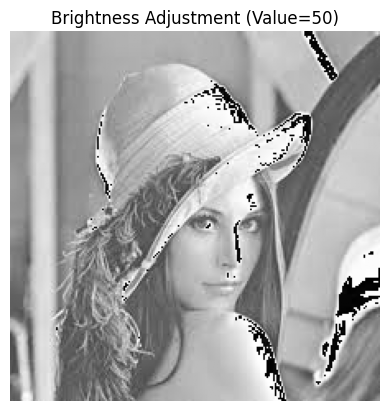

In [ ]:
brightness = 50 
# قيمتها من -255 إلى 255 
brightness_img = np.zeros_like(img_gray) 
for i in range(rows): 
    for j in range(cols): 
        val = img_gray[i, j] + brightness 
        if val > 255: val = 255 
        elif val < 0: val = 0 
        brightness_img[i, j] = val 
plt.imshow(brightness_img, cmap='gray') 
plt.title(f"Brightness Adjustment (Value={brightness})") 
plt.axis('off') 
plt.show() 

# 10. Adaptive Histogram Equalization (CLAHE) - Manual 
# تحسين التباين عن طريق تطبيق الهيستوجرام على كتل صغيرة من الصورة.

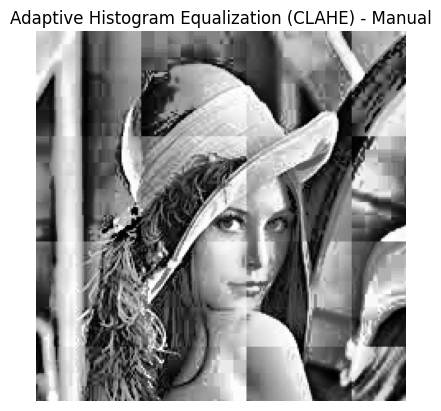

In [ ]:
block_size = 64 # حجم الكتلة 

equalized_adaptive = np.zeros_like(img_gray) 
for row in range(0, rows, block_size): 
    for col in range(0, cols, block_size): 
        block = img_gray[row:row+block_size, col:col+block_size] 
        block_rows, block_cols = block.shape 
        hist = np.zeros(256) 
        for i in range(block_rows): 
            for j in range(block_cols): 
                hist[block[i, j]] += 1 
        cdf = np.zeros(256) 
        cdf[0] = hist[0] 
        for k in range(1, 256): 
            cdf[k] = cdf[k-1] + hist[k] 
        cdf_min = 0 
        for k in range(256): 
            if cdf[k] != 0: 
                cdf_min = cdf[k] 
                break 
        total_pixels = block_rows * block_cols 
        cdf_normalized = np.zeros(256) 
        for k in range(256): 
            cdf_normalized[k] = round(((cdf[k] - cdf_min) / (total_pixels - cdf_min)) * 255) 
        for i in range(block_rows): 
            for j in range(block_cols): 
                equalized_adaptive[row+i, col+j] = cdf_normalized[block[i, j]] 
plt.imshow(equalized_adaptive, cmap='gray') 
plt.title("Adaptive Histogram Equalization (CLAHE) - Manual") 
plt.axis('off') 
plt.show() 
